# 3. 线性神经网络
- 3.1 线性回归的从零开始实现

1. 构造一个带有噪声的线性模型的输入数据集。
2. 使用这个数据集来回复模型参数
3. 生成包含 1000 一个样本的数据集, 每个数据集包含2个特征, 这两个特征从标准正太分布中采样得到, 构造成 1000 * 2 的矩阵
4. 假设线性模型为 $\mathbf{y}=\mathbf{X}\mathbf{w}+\mathbf{b} + \epsilon$
4.1 其中 $\mathbf{w}=[2,-3,4]^T$ 的列向量, b=4.2 $\epsilon$ 是一个噪声值(是一个均值为0, 方差为0.01的高斯分布)

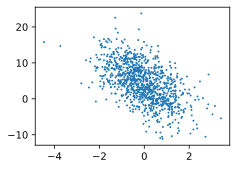

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
import random
import torch
from d2l import torch as d2l


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1) # 将y转为形状为 n 行, 1列的矩阵

true_w = torch.tensor([2., -3, 4]) # len(true_w)=3
# print(len(true_w))
true_b = 4.2
# X 是 100 * 3 的矩阵, w 是 3 * 1 的矩阵, Xw -> 1000 * 1 的矩阵
features, labels = synthetic_data(true_w, true_b, 1000)
# print('features:', features.shape, 'labels:', labels.shape)
# print(features[0], labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

3.2 读取数据集
```text
训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型, 定义一个函数 这个函数能打乱数据集中的样本并以小批量方式获取数据
```

In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
import random
import torch
from d2l import torch as d2l


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1) # 将y转为形状为 n 行, 1列的矩阵

true_w = torch.tensor([2., -3, 4]) # len(true_w)=3
# print(len(true_w))
true_b = 4.2
# X 是 100 * 3 的矩阵, w 是 3 * 1 的矩阵, Xw -> 1000 * 1 的矩阵
features, labels = synthetic_data(true_w, true_b, 1000)

def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples)) # 生成一个从0到num_examples-1的列表
    # 打乱顺序
    random.shuffle(indices) # 打乱顺序
    # print(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


# labels = torch.arange(1000).reshape(-1, 1)
# data_iter(10, [], labels)

# batch_size = 10
# for X, y in data_iter(batch_size, features, labels):
#     print(X.shape, y.shape)
#     print(X,'\n', y)
#     break



torch.Size([10, 3]) torch.Size([10, 1])
tensor([[-4.0934e-01,  1.3834e+00,  6.8934e-01],
        [-1.6623e+00,  4.7797e-01, -1.6751e-01],
        [-7.6238e-01, -2.7690e+00, -7.7733e-02],
        [-2.2190e-01, -1.2567e+00, -3.7578e-02],
        [-1.2795e+00,  1.0819e+00, -1.2031e+00],
        [ 1.2195e-01, -1.2804e+00,  5.9835e-01],
        [ 2.5223e-01, -8.6300e-01, -8.4343e-01],
        [-1.3094e+00, -7.3722e-01,  5.5371e-01],
        [ 1.1793e-02, -6.0237e-01,  5.0658e-04],
        [ 8.2287e-01, -5.1119e-02, -1.5839e-01]]) 
 tensor([[ 1.9856],
        [-1.2223],
        [10.6730],
        [ 7.3737],
        [-6.4171],
        [10.6812],
        [ 3.9196],
        [ 6.0128],
        [ 6.0255],
        [ 5.3563]])


- 3.3 初始化模型参数
```text
w 从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重
b 并将偏置初始化为0

初始化参数之后，通过任务更新这些参数，直到这些参数足够拟合我们的数据。 每次更新都需要计算损失函数关于模型参数的梯度。 有了这个梯度，我们就可以向减小损失的方向更新每个参数。 因为手动计算梯度很枯燥而且容易出错，所以没有人会手动计算梯度
```

In [11]:
import torch

w = torch.normal(0, 0.01, (2, 1), requires_grad=True) # 均值为0, 标准差为0.01, 形状为2 * 1的矩阵, 开启梯度记录
b = torch.zeros(1, requires_grad=True) # 形状为1 * 1的矩阵, 开启梯度记录
# print(w, b)


tensor([[-6.3840e-05],
        [-8.2226e-04]], requires_grad=True) tensor([0.], requires_grad=True)


- 3.4 定义模型

In [ ]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

- 3.5 定义损失函数

In [ ]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

- 3.6 定义优化算法
```text
使用小批量随机梯度下降

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。 接下来，朝着减少损失的方向更新我们的参数。下面的函数实现小批量随机梯度下降更新。 该函数接受模型参数集合、学习速率和批量大小作为输入。每 一步更新的大小由学习速率lr决定。 因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size） 来规范化步长，这样步长大小就不会取决于我们对批量大小的选择
```

In [ ]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

- 3.7 训练

In [40]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

%matplotlib inline
import random
import torch


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)  # 将y转为形状为 n 行, 1列的矩阵

def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples)) # 生成一个从0到num_examples-1的列表
    # 打乱顺序
    random.shuffle(indices) # 打乱顺序
    # print(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size): # 随机梯度下降, 用来更新神经网络的参数
    # print(params)
    """小批量随机梯度下降"""
    with torch.no_grad(): # 禁用梯度计算, no_grad 上下文中所有操作都不会跟踪梯度
        for param in params:
            # print(param.grad)
            # 梯度下降公式 θ = θ - η × ∇L
            # 𝐰_𝑡=𝐰_(𝑡−1)−𝜂 𝜕ℓ/(𝜕𝐰_(𝑡−1) )
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# w = torch.normal(0, 0.01, (2, 1), requires_grad=True) # 均值为0, 标准差为0.01, 形状为2 * 1的矩阵, 开启梯度记录
# # w = torch.zeros((2, 1), requires_grad=True) # 测试权重初始为0的情况
# b = torch.zeros(1, requires_grad=True) # 形状为1 * 1的矩阵, 开启梯度记录

true_w = torch.tensor([2., -3.4])
true_b = 4.2
# print(w, b)
features, labels = synthetic_data(true_w, true_b, 1000)

batch_size = 10 # 批量大小, 每次迭代的样本数量, 调整这个好像也没有什么改变
lr = 0.03 # 学习率, 调整这个值好像没啥改变
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        # net(X, w, b) 是y实际取值, y 是 带噪声的实际样本数据
        l = loss(net(X, w, b), y) # net(X, w, b) 计算的是预期值y, y 是 data_iter 生成的实际y值
        l.sum().backward(retain_graph=True) # 需要多次反向传播或复杂的梯度计算, 需要设置 retain_graph=True 不然会提示梯度处理有问题,
        sgd([w, b], lr, batch_size) # 计算梯度, 更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

# print(f'w: {w}, \nb: {b}')
# true_w = torch.tensor([2., -3]) # len(true_w)=2
# # print(len(true_w))
# true_b = 4.2
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051
w的估计误差: tensor([0.0002, 0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0005], grad_fn=<RsubBackward1>)
